In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist as fdist
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df1 = pd.read_excel("da_india.xlsx",encoding="utf-8")
df2 = pd.read_excel("ds_india.xlsx",encoding="utf-8")
df3 = pd.read_excel("da_usa.xlsx",encoding="utf-8")
df4 = pd.read_excel("ds_usa.xlsx",encoding="utf-8")
df5 = pd.read_excel("da_uk.xlsx",encoding="utf-8")
df6 = pd.read_excel("ds_uk.xlsx",encoding="utf-8")
df = pd.concat([df1,df2,df3,df4,df5,df6], axis=0).drop_duplicates()
df.shape

(904, 7)

In [4]:
df.head()

,company,description,id,location,positionName,reviews,url
0,Fidelity International,About the opportunity\nDepartment Description\...,1d0bea7eb780e7ec,"Gurgaon, Haryana",Data Analyst,103.0,https://in.indeed.com/rc/clk?jk=1d0bea7eb780e7...
1,GroundTruth,"Role: Data Analyst\nLocation: Gurgaon, India\n...",c4a563e6e7c30317,"Gurgaon, Haryana",Data Analyst (Tier I Colleges),NaN,https://in.indeed.com/rc/clk?jk=c4a563e6e7c303...
2,Simpolo EmilCeramica,Job Description\nRoles and Responsibilities\nW...,f921cc55aaaa5781,"Morbi, Gujarat",Data Analyst,NaN,https://in.indeed.com/rc/clk?jk=f921cc55aaaa57...
3,bp,Job Profile Summary\nOverview\nThe purpose of ...,ce8f415fd1a02837,"Pune, Maharashtra",People Data Analyst,4124.0,https://in.indeed.com/rc/clk?jk=ce8f415fd1a028...
4,Morningstar,In this role you will work on collecting funda...,d920c6dc413c337a,"Mumbai, Maharashtra",Data Research Analyst,NaN,https://in.indeed.com/rc/clk?jk=d920c6dc413c33...


In [5]:
df.tail()

,company,description,id,location,positionName,reviews,url
164,MOLOCO,About MOLOCO\n\nMOLOCO is a machine learning c...,87b1c0ef5735bc2c,London,Data Scientist - UK,NaN,https://uk.indeed.com/rc/clk?jk=87b1c0ef5735bc...
165,NHS Test and Trace,Fixed Term Contract\nData Scientist - Day Shif...,03fe27c532da3dfe,Leamington Spa,Data Scientist - Day Shift,3312.0,https://uk.indeed.com/rc/clk?jk=03fe27c532da3d...
166,Sensor Tower,Who We Are:\nSensor Tower is the leading solut...,2b8f69589df0c1d8,London,Full Stack Data Scientist,NaN,https://uk.indeed.com/rc/clk?jk=2b8f69589df0c1...
167,Plymouth University,"The School of Geography, Earth and Environment...",b4cc66363ea79bbf,Plymouth,Research Assistant (Data Science/Analysis),101.0,https://uk.indeed.com/rc/clk?jk=b4cc66363ea79b...
168,Cuvva,Department\nData and Pricing\nEmployment Type\...,30abe2899fa1b204,London,Senior Data Scientist - Marketing / Growth,NaN,https://uk.indeed.com/rc/clk?jk=30abe2899fa1b2...


# Companies with highest job listing for Data Analyst in India

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


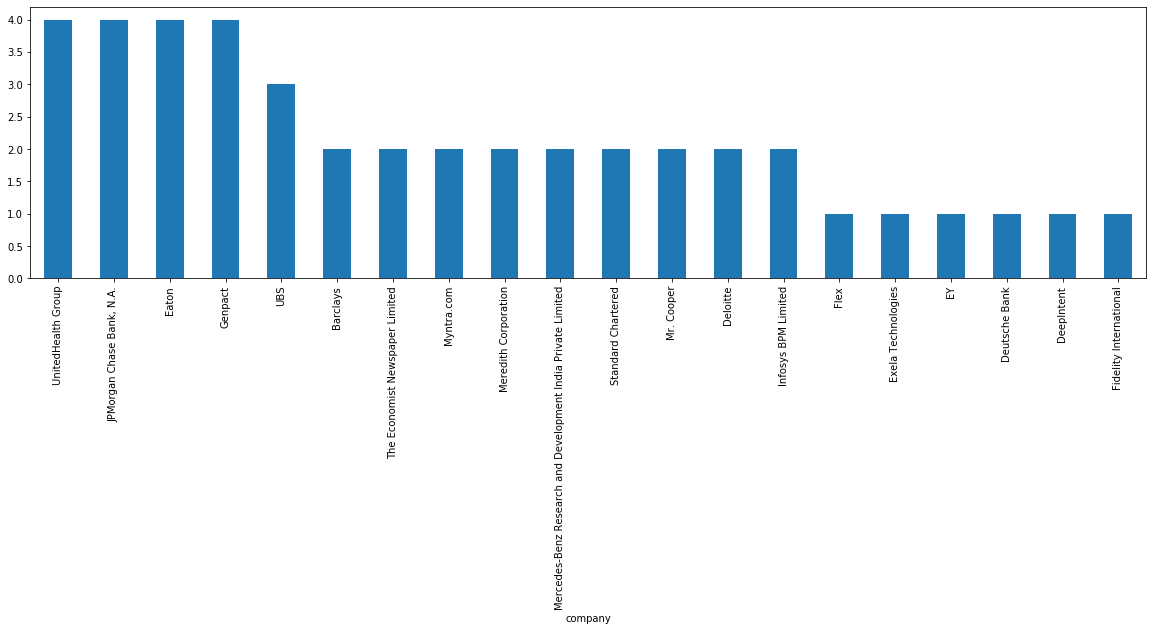

In [7]:
##Task 1: Find companies with highest number of job listings
counts = df1.groupby("company").count()["positionName"].sort_values(ascending=False)[:20]
counts.plot("bar",figsize=(20,5))

# Companies with highest job listing for data scientist in India

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


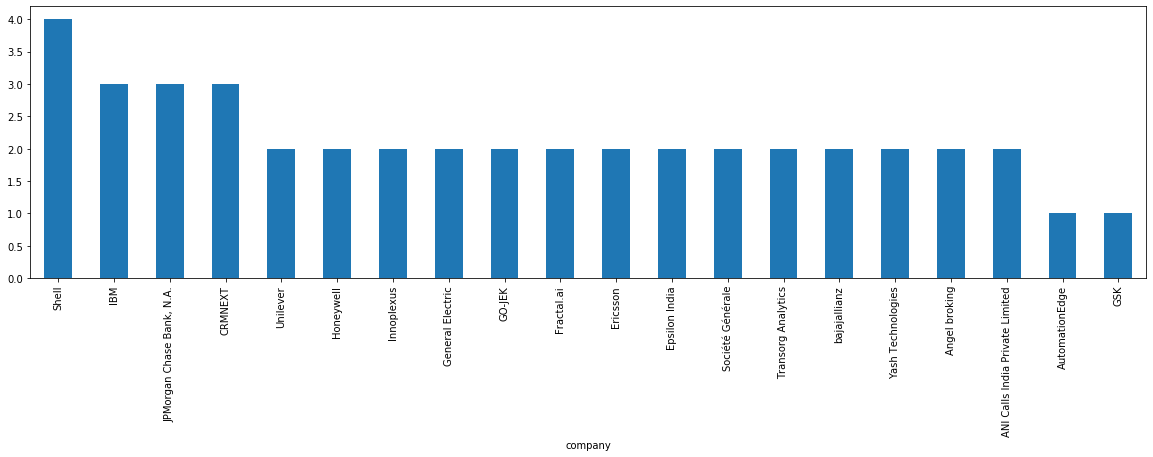

In [8]:
##Task 1: Find companies with highest number of job listings
counts = df2.groupby("company").count()["positionName"].sort_values(ascending=False)[:20]
counts.plot("bar",figsize=(20,5))

# Location with highest job listing

In [14]:
##Task 2: Find Locations with highest number of job listings
loc_counts_da = df1.groupby("location").count()["positionName"].sort_values(ascending=False)[:10]
loc_counts_ds = df2.groupby("location").count()["positionName"].sort_values(ascending=False)[:10]
print("Location for Data Analyst " , loc_counts_da)
print("---------------------------------------------")
print("Location for Data Scientist " , loc_counts_ds)

Location for Data Analyst  location
Bengaluru, Karnataka    43
Gurgaon, Haryana        21
Pune, Maharashtra       17
Chennai, Tamil Nadu     16
Hyderabad, Telangana    15
Mumbai, Maharashtra     10
India                    8
Delhi, Delhi             5
Noida, Uttar Pradesh     4
New Delhi, Delhi         3
Name: positionName, dtype: int64
---------------------------------------------
Location for Data Scientist  location
Bengaluru, Karnataka    54
Pune, Maharashtra       16
Chennai, Tamil Nadu     14
Mumbai, Maharashtra     13
Gurgaon, Haryana         8
India                    7
Remote                   6
Hyderabad, Telangana     6
Noida, Uttar Pradesh     5
Delhi, Delhi             3
Name: positionName, dtype: int64


# Lets check out the required skills and experience in India

In [18]:
def cleanData(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc if word.isalpha() and len(word) > 2]
    desc = [word for word in desc if word not in stop_words]
    return desc

In [24]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

tags_df1 = df1["description"].apply(cleanData)
tags_df2 = df2["description"].apply(cleanData)
tags_df3 = df3["description"].apply(cleanData)
tags_df4 = df4["description"].apply(cleanData)
tags_df5 = df5["description"].apply(cleanData)
tags_df6 = df6["description"].apply(cleanData)

In [20]:
from collections import Counter
result = tags_df.apply(Counter).sum().items()
result = sorted(result, key=lambda kv: kv[1],reverse=True)
result_series = pd.Series({k: v for k, v in result})

In [21]:
#skills = ["tableau","power","qlik"]
#skills = ["aws","azure"]
#skills = ["nltk","pandas","numpy","matplotlib","jupyter","opencv"]
#skills = ["statistics","machine","deep","neural","predictive"]
skills = ["experienced","expert","intern","intermediate","begineer","fresher"]

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


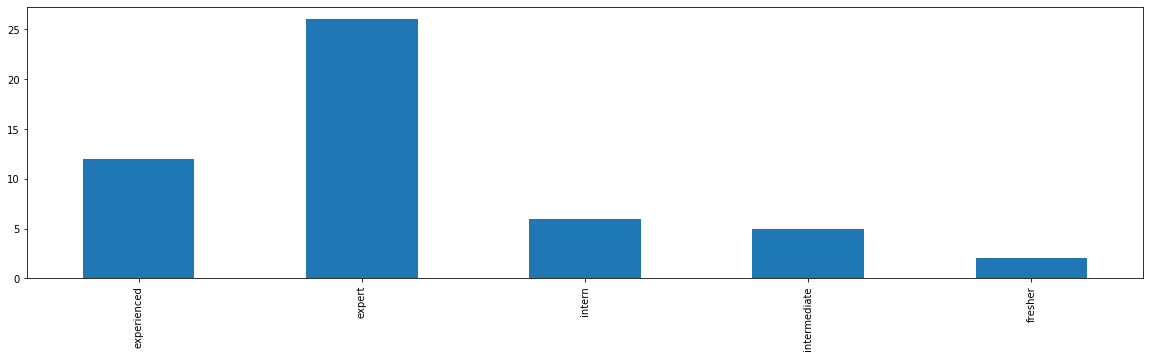

In [22]:
filter_series = result_series.filter(items=skills)
filter_series.plot('bar',figsize=(20,5))

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  import sys


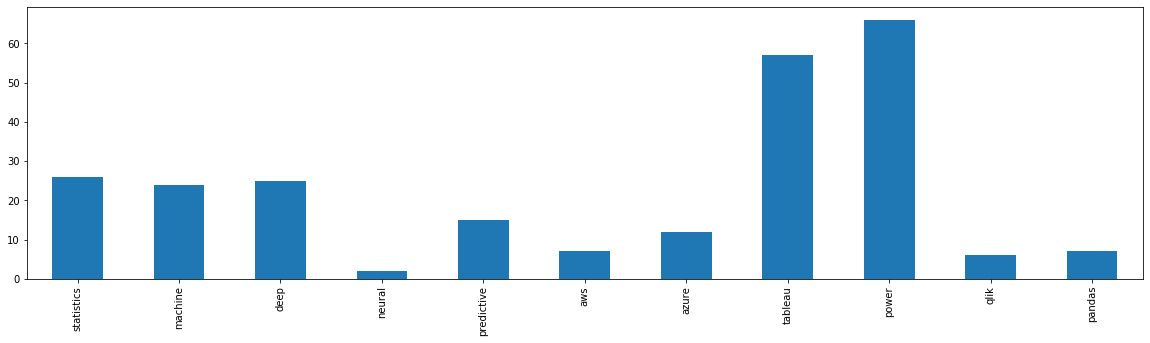

In [23]:
#skills = ["tableau","power","qlik"]
#skills = ["aws","azure"]
#skills = ["nltk","pandas","numpy","matplotlib","jupyter","opencv"]
skills = ["statistics","machine","deep","neural","predictive","opencv", "aws","azure","tableau","power","qlik","pandas"]

filter_series = result_series.filter(items=skills)
filter_series.plot('bar',figsize=(20,5))

In [25]:
result = tags_df2.apply(Counter).sum().items()
result = sorted(result, key=lambda kv: kv[1],reverse=True)
result_series = pd.Series({k: v for k, v in result})

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


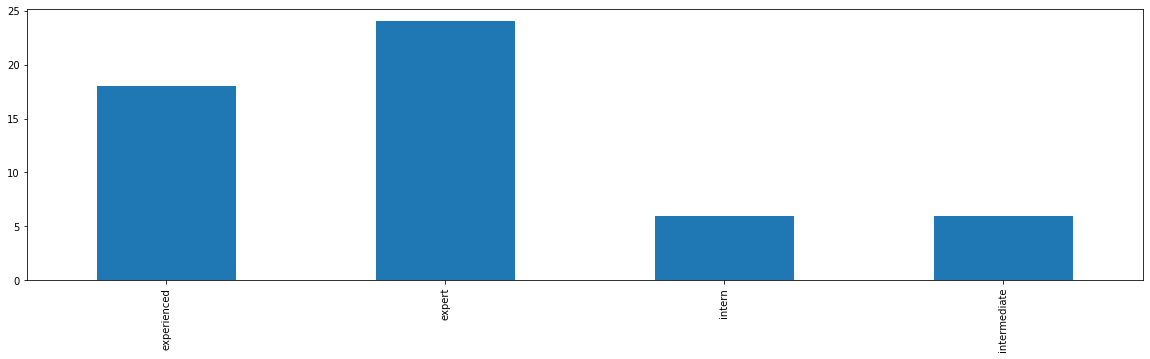

In [28]:
skills = ["experienced","expert","intern","intermediate","begineer","fresher"]
filter_series = result_series.filter(items=skills)
filter_series.plot('bar',figsize=(20,5))

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


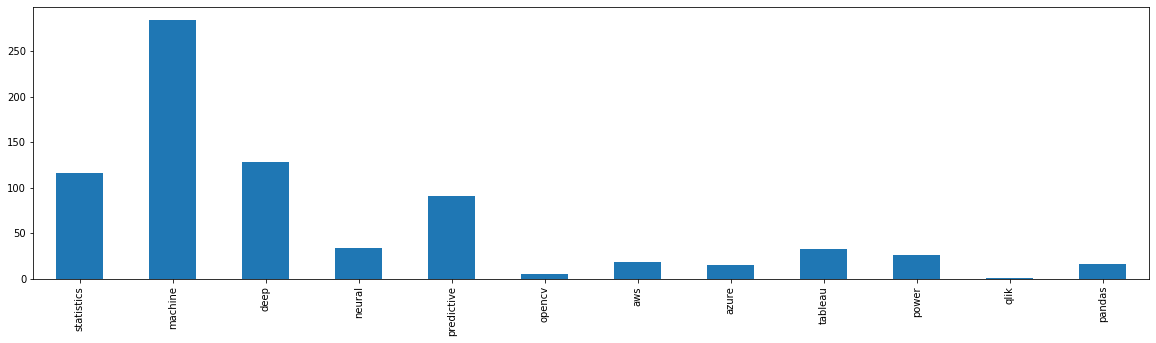

In [29]:
skills = ["statistics","machine","deep","neural","predictive","opencv", "aws","azure","tableau","power","qlik","pandas"]

filter_series = result_series.filter(items=skills)
filter_series.plot('bar',figsize=(20,5))

# Companies with highest job listing for data analyst in USA

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


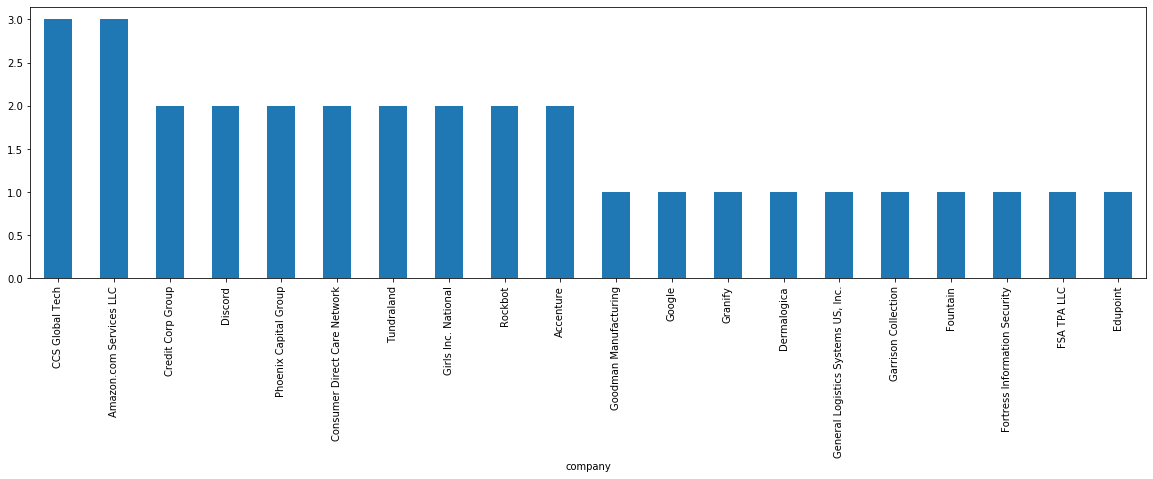

In [10]:
##Task 1: Find companies with highest number of job listings
counts = df3.groupby("company").count()["positionName"].sort_values(ascending=False)[:20]
counts.plot("bar",figsize=(20,5))

# Companies with highest job listing for data scientist in USA

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


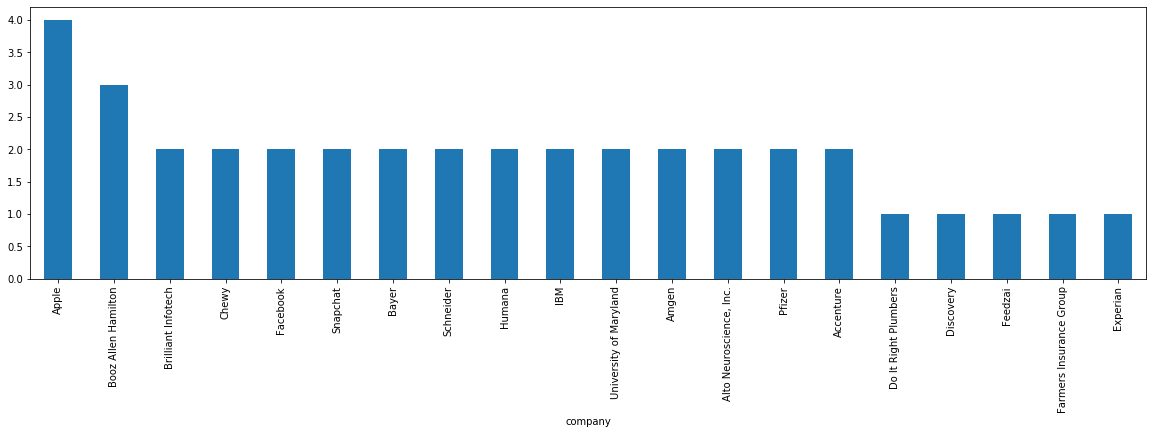

In [11]:
##Task 1: Find companies with highest number of job listings
counts = df4.groupby("company").count()["positionName"].sort_values(ascending=False)[:20]
counts.plot("bar",figsize=(20,5))

# Location with highest job listing

In [15]:
##Task 2: Find Locations with highest number of job listings
loc_counts_da = df3.groupby("location").count()["positionName"].sort_values(ascending=False)[:10]
loc_counts_ds = df4.groupby("location").count()["positionName"].sort_values(ascending=False)[:10]
print("Location for Data Analyst " , loc_counts_da)
print("---------------------------------------------")
print("Location for Data Scientist " , loc_counts_ds)

Location for Data Analyst  location
Remote               8
Los Angeles, CA      2
Irvine, CA 92618     2
Draper, UT           2
San Antonio, TX      2
San Francisco, CA    2
Santa Barbara, CA    2
Phoenix, AZ 85034    2
New York, NY         2
Irvine, CA 92614     2
Name: positionName, dtype: int64
---------------------------------------------
Location for Data Scientist  location
Remote               22
California            4
San Francisco, CA     4
New York, NY          4
Washington, DC        4
Boston, MA            4
Arlington, VA         3
Austin, TX            3
Seattle, WA 98109     3
Louisville, KY        2
Name: positionName, dtype: int64


# Skills and experience for USA

In [30]:
result = tags_df3.apply(Counter).sum().items()
result = sorted(result, key=lambda kv: kv[1],reverse=True)
result_series = pd.Series({k: v for k, v in result})

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


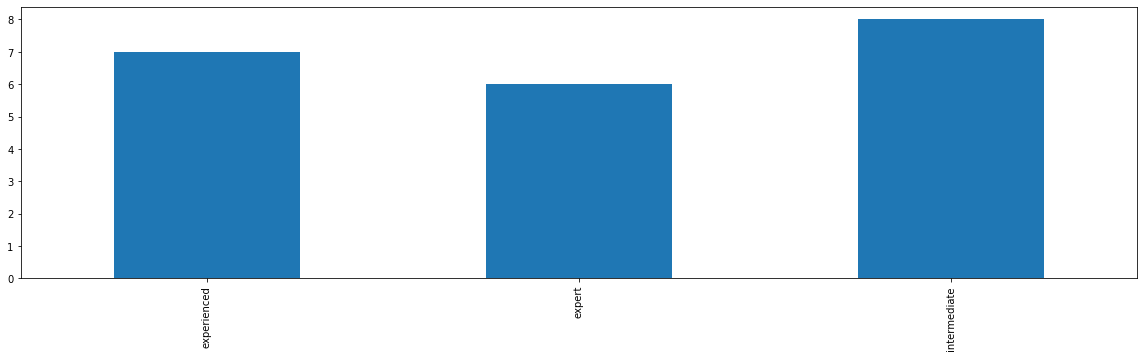

In [31]:
skills = ["experienced","expert","intern","intermediate","beginner","fresher"]
filter_series = result_series.filter(items=skills)
filter_series.plot('bar',figsize=(20,5))

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


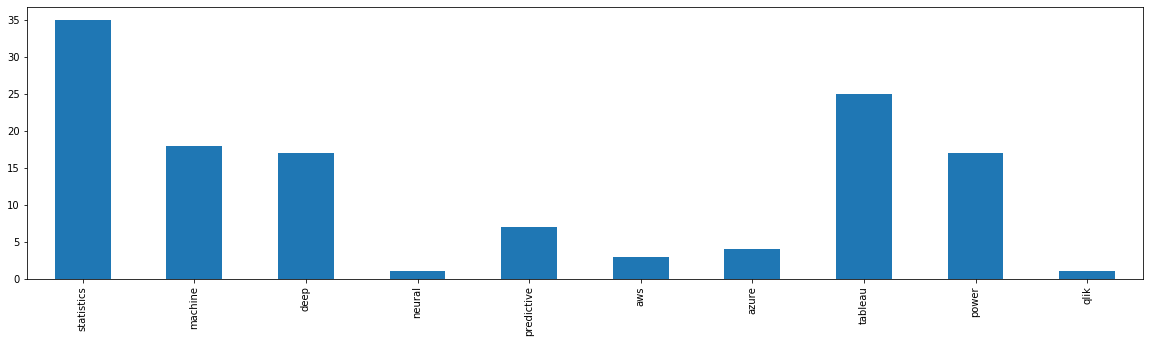

In [32]:
skills = ["statistics","machine","deep","neural","predictive","opencv", "aws","azure","tableau","power","qlik","pandas"]

filter_series = result_series.filter(items=skills)
filter_series.plot('bar',figsize=(20,5))

In [33]:
result = tags_df4.apply(Counter).sum().items()
result = sorted(result, key=lambda kv: kv[1],reverse=True)
result_series = pd.Series({k: v for k, v in result})

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


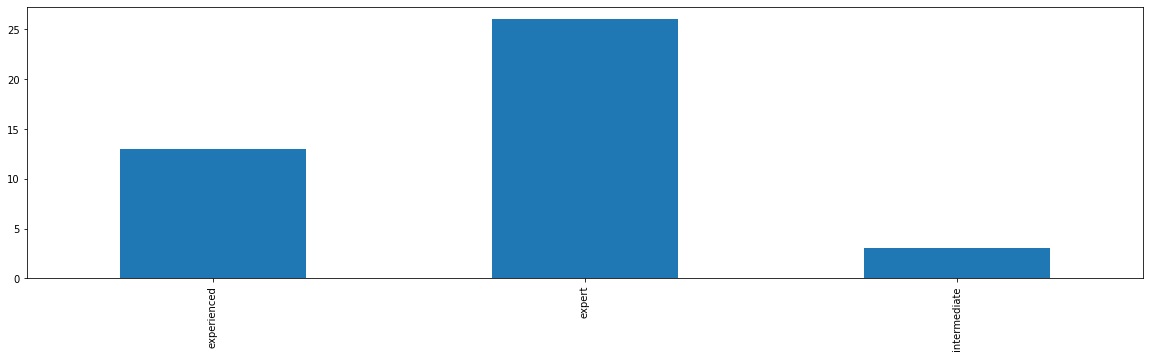

In [34]:
skills = ["experienced","expert","intern","intermediate","beginner","fresher"]
filter_series = result_series.filter(items=skills)
filter_series.plot('bar',figsize=(20,5))

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


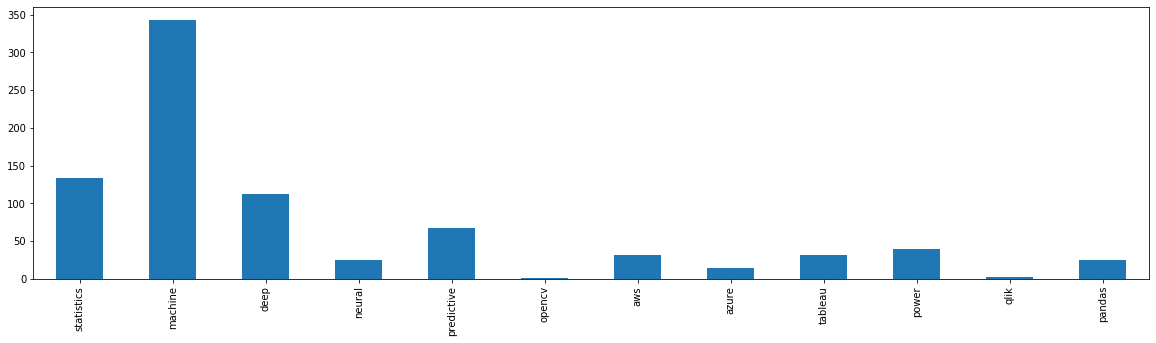

In [35]:
skills = ["statistics","machine","deep","neural","predictive","opencv", "aws","azure","tableau","power","qlik","pandas"]

filter_series = result_series.filter(items=skills)
filter_series.plot('bar',figsize=(20,5))

# Companies with highest job listing for data analyst in UK

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


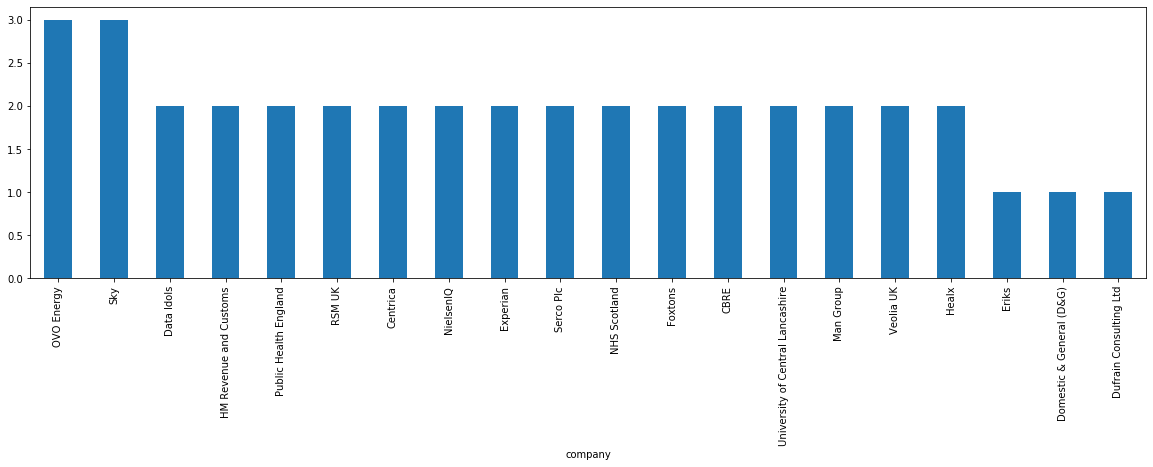

In [12]:
##Task 1: Find companies with highest number of job listings
counts = df5.groupby("company").count()["positionName"].sort_values(ascending=False)[:20]
counts.plot("bar",figsize=(20,5))

# Companies with highest job listing for data scientist in UK

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


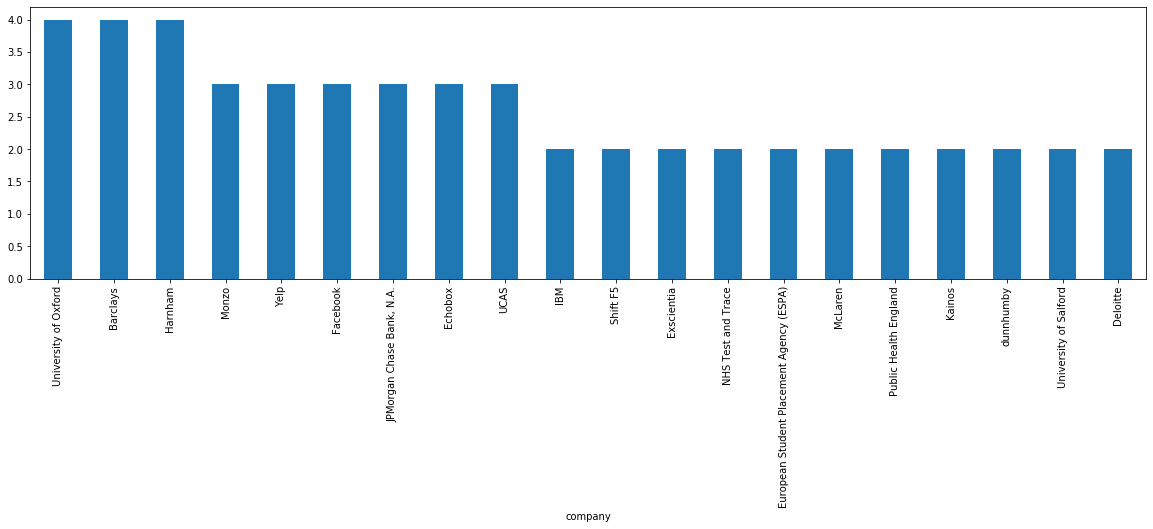

In [13]:
##Task 1: Find companies with highest number of job listings
counts = df6.groupby("company").count()["positionName"].sort_values(ascending=False)[:20]
counts.plot("bar",figsize=(20,5))

# Location with highest job listing

In [16]:
##Task 2: Find Locations with highest number of job listings
loc_counts_da = df5.groupby("location").count()["positionName"].sort_values(ascending=False)[:10]
loc_counts_ds = df6.groupby("location").count()["positionName"].sort_values(ascending=False)[:10]
print("Location for Data Analyst " , loc_counts_da)
print("---------------------------------------------")
print("Location for Data Scientist " , loc_counts_ds)

Location for Data Analyst  location
London        21
Home Based     7
Bristol        7
Leeds          5
Manchester     4
Glasgow        4
Reading        3
Cambridge      3
London W4      3
Preston        3
Name: positionName, dtype: int64
---------------------------------------------
Location for Data Scientist  location
London                 66
Home Based              6
Oxford                  5
Glasgow                 4
Gloucestershire         4
Newcastle upon Tyne     3
Birmingham              3
Cambridgeshire          2
Coventry                2
Cambridge               2
Name: positionName, dtype: int64


# Skills and experience for UK

In [37]:
result = tags_df5.apply(Counter).sum().items()
result = sorted(result, key=lambda kv: kv[1],reverse=True)
result_series = pd.Series({k: v for k, v in result})

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


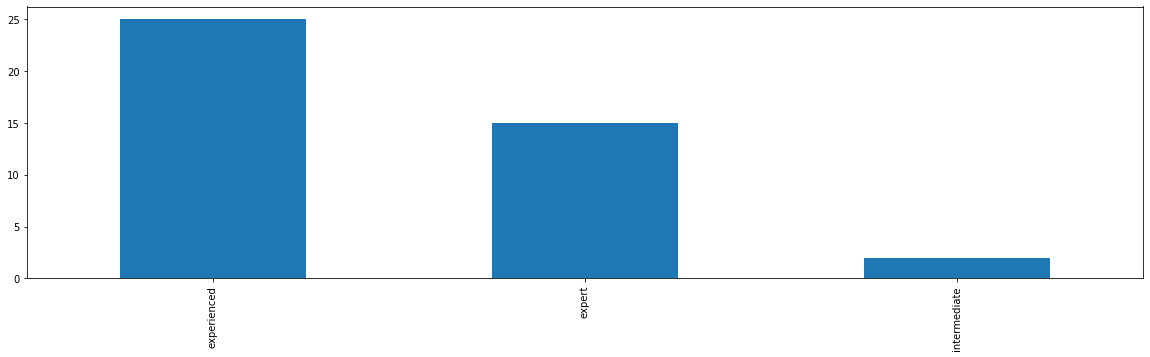

In [38]:
skills = ["experienced","expert","intern","intermediate","beginner","fresher"]
filter_series = result_series.filter(items=skills)
filter_series.plot('bar',figsize=(20,5))

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


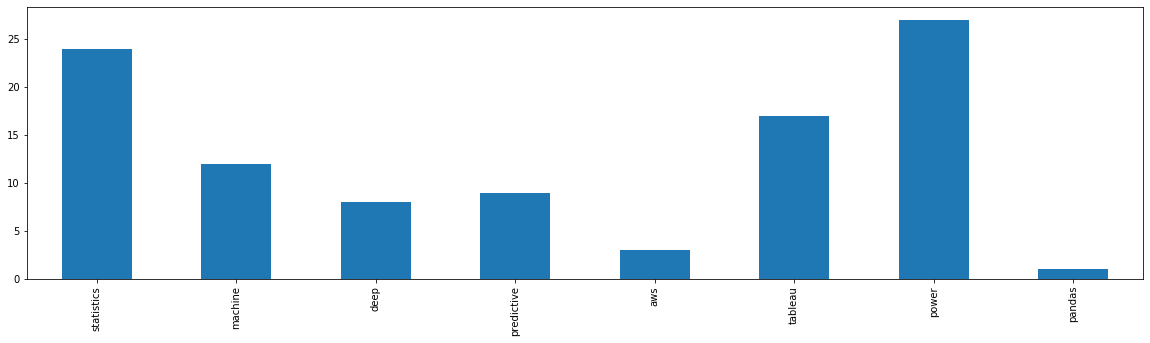

In [39]:
skills = ["statistics","machine","deep","neural","predictive","opencv", "aws","azure","tableau","power","qlik","pandas"]

filter_series = result_series.filter(items=skills)
filter_series.plot('bar',figsize=(20,5))

In [40]:
result = tags_df6.apply(Counter).sum().items()
result = sorted(result, key=lambda kv: kv[1],reverse=True)
result_series = pd.Series({k: v for k, v in result})

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


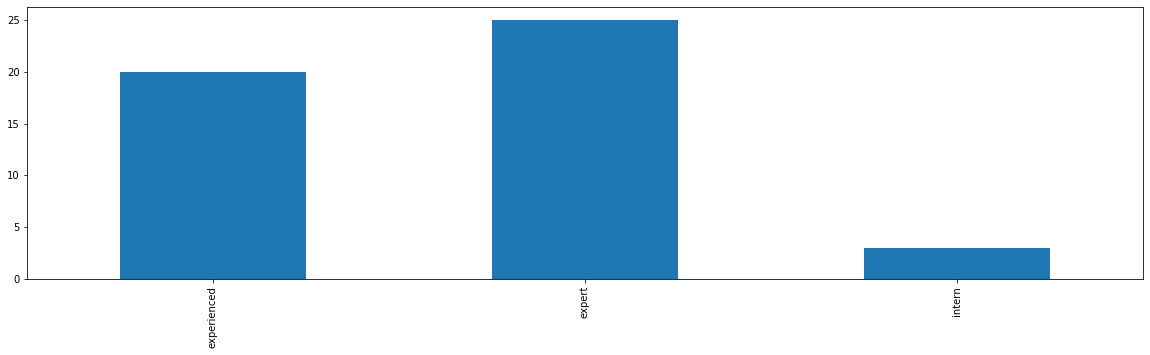

In [41]:
skills = ["experienced","expert","intern","intermediate","beginner","fresher"]
filter_series = result_series.filter(items=skills)
filter_series.plot('bar',figsize=(20,5))

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


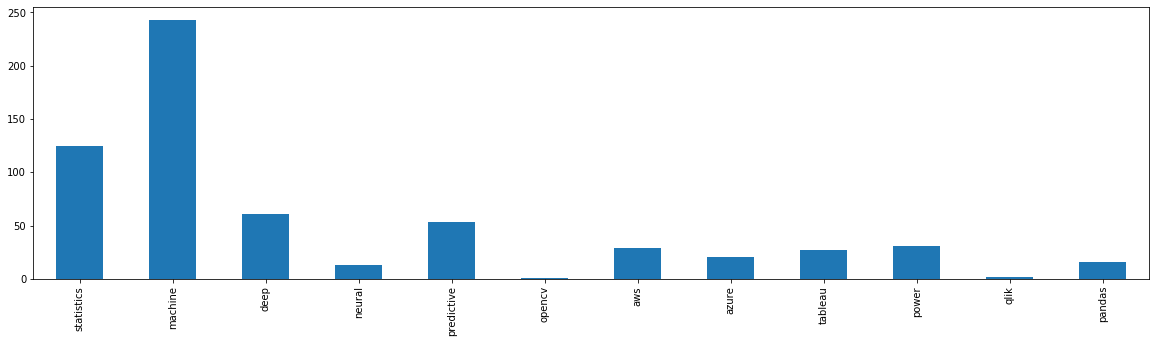

In [42]:
skills = ["statistics","machine","deep","neural","predictive","opencv", "aws","azure","tableau","power","qlik","pandas"]

filter_series = result_series.filter(items=skills)
filter_series.plot('bar',figsize=(20,5))